# CSCI 3352 Biological Networks, Spring 2023, Prof. Clauset
Submit here: https://canvas.colorado.edu/courses/91192

# Problem Set 2 : Network representations and statistics

***

**Name**: ANNA HIRSCHMANN

COLLABORATORS: I discussed these questions with Carol Chang and Juila Bao and otherwise relied on Networkx documentation to complete this assignment. 

***

This assignment is due on Canvas by **11:55pm on Friday, February 3**. Your solutions to non-programming questions should be done in Markdown directly below the associated question. Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own** (see syllabus for detailed guidance). There are 100 points total, and 17 pts extra credit.

**NOTES**: 

- Unless a url is given for a data set, you will find the required data on the course Canvas.
- If you're not familiar with typesetting math directly in Markdown, you may do your work on paper first and then typeset it later. This [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) provides helpful guidance for writing math in Markdown. 
- It is **unhelpful** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.

***
* networkx [Documentation](https://networkx.github.io/documentation/stable/) and [Tutorial](https://networkx.github.io/documentation/stable/tutorial.html)
* igraph [Documentation](https://igraph.org/python/versions/latest/install.html) and [Tutorial](https://igraph.org/python/tutorial/0.9.8/tutorial.html)

In [1]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline

***
## Problem 1 : Counting motifs (55 pts total)

Motifs are small subgraphs, often of 3 or 4 nodes, and their relative abundance can provide evidence for or against different underlying network assembly processes. Analyzing this kind of information depends on being able to count the number of occurrences of target motifs in a given network. In this problem, we'll develop such a counting algorithm.

***
### Problem 1-A (30 pts)

In directed networks, the two most commonly studied motifs are
* feed-forward loop ("FFL")
* cycle (sometimes called a feedback loop, or "FBL")

For instance, below is a simple directed graph (a "digraph") that contains one of each: the FFL is among nodes $\{1,2,3\}$ and the FBL is among nodes $\{4,5,6\}$.

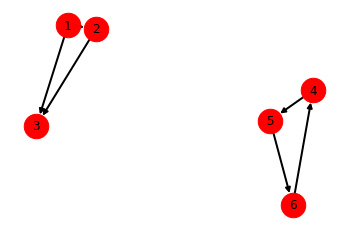

In [33]:
G = nx.DiGraph([(1,2), (2,3), (1,3), (4,5), (5,6), (6,4)])                            # make a directed network
nx.draw_networkx(G,arrows=True,with_labels=True,node_size=600,node_color='r',width=2) # draw it pretty
limits=plt.axis('off')                                                                # turn off axes
plt.show()   # show me the network!

#print([n for n in G.neighbors(2)])

* Write a function `count_FFBL_motifs()` that takes as input a directed graph `G` and a binary value `flag` and
  1. if `flag==1`, prints a statement of the form `FFL: (i,j),(j,k),(i,k)` or `FBL: (i,j),(j,k),(k,i)` for each FFL or non-unique FBL it finds, and
  * returns the counts the number of FFL motifs and the number of FBL motifs that `G` contains. <br/>
  
* Apply your function to the network `G` defined below, with `flag=1`, and report the FFL and FBL motif counts.
* Briefly explain how your algorithm for `count_FFBL_motifs()` works. (Note that the network is small enough that you can calculate the result by hand and use that information to debug your algorithm.)

Hint: Use a graph traversal approach to enumerate all paths of length two, e.g. $\sigma_{ijk} = \{(i\rightarrow j), (j \rightarrow k)\}$, where $i\not=k$, and for each, query the network for the existence of the third edge of the motif, either $(i,k)$ or $(k,i)$ depending on which motif is being counted. Within the DiGraph structure of `networkx`, the `neighbors` and `has_edge` functions will be useful.

*Warning*: remember that a single unique FBL motif can be counted 3 times, once for a 3-cycle starting at each of $i$, $j$, and $k$.

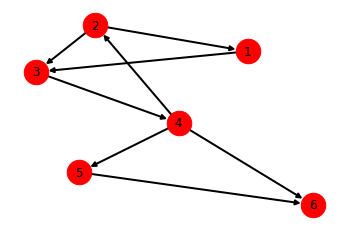

In [44]:
G = nx.DiGraph([(1,3),(2,1),(2,3),(3,4),(4,2),(4,5),(4,6),(5,6)])
nx.draw_networkx(G,arrows=True,with_labels=True,node_size=600,node_color='r',width=2) # draw it pretty
limits=plt.axis('off')                                                                # turn off axes
plt.show()                                                                            # show me the network!

In [43]:
def count_FFBL_motifs(G,flag):
    # input : a networkx digraph G and a binary-valued variabe flag
    # output: if flag=1, a print statement of the type {FFL,FBL} and its member edges for each found motif
    #         a list (FFL,FBL) of the counts of feed-forward and feed-back loops in G
    
    # YOUR CODE HERE
    
    FBL_count = 0
    FFL_count = 0
    
    for n in G:
        for i in G.neighbors(n):
            for j in G.neighbors(i):
                if G.has_edge(j, n):
                    FBL_count += 1
                    
                    if flag == 1:
                        print(f'FBL: ({n}, {i}), ({i}, {j}), ({j}, {n})')
                        
                elif G.has_edge(n, j):
                    FFL_count += 1
                    
                    if flag == 1:
                        print(f'FFL: ({n}, {i}), ({i}, {j}), ({n}, {j})')
        
    FBL_count //= 3
    
    return (FFL_count,FBL_count)

In [36]:
#count_FFBL_motifs(G,1)

In [37]:
##### do not modify below here #####
counts = count_FFBL_motifs(G,1)

print(f'FFL count = {counts[0]}')
print(f'FBL count = {counts[1]}')

FBL: (3, 4), (4, 2), (2, 3)
FFL: (2, 1), (1, 3), (2, 3)
FBL: (2, 3), (3, 4), (4, 2)
FBL: (4, 2), (2, 3), (3, 4)
FFL: (4, 5), (5, 6), (4, 6)
FFL count = 2
FBL count = 1


My algorithm breaks the problem into smaller steps:
* First, I loop through all nodes $n$ in the graph. 
* For each node, I loop through their list of neighbors $i$. This list of neighbors contains only nodes such that $n \rightarrow i$ in the network. 
* For each of those neighbors, I loop through *their* neighbors to identify all nodes $j$ that can be reached from $i$ via a path of length two. 
* Once I have identified all of these nodes, the algorithm checks if there is an edge $j \rightarrow i$ (indicating a feedback loop) or from $i \rightarrow j$ (indicating a feed-forward loop). If either of these motifs exist, a counter is augmented to reflect this and a print statement is tripped in the case that our binary flag==1. NOTE: this means that each feedback loop will be displayed 3 times by the print statment, once starting at each of the three nodes featured in the motif.
* Finally, at the end, the number of feedback loops is divided by 3 to reflect the fact that they are triple-counted by the algorithm, so the count reflects the number of *unique* FBLs in the network. 

### Problem 1-B (15 pts)
Before applying your motif counting function from `Problem 1-A` to some real data, follow the standard 'good practice' when importing a new network data set by computing and examining its summary statistics, which provides context for interpreting the output from counting motifs.

For the `metabolism_afulgidus` directed network, compute and report
* the number of nodes $n$ and directed edges $m$
* the mean in-degree $\langle k_{\rm in} \rangle$ and mean out-degree $\langle k_{\rm out} \rangle$
* a CCDF plot showing the in- and out-degree distribution $\Pr(K \geq k_{\rm in})$ and $\Pr(K \geq k_{\rm out})$ together (use the provided `plot_2CCDF()` function).
* the smallest number of nodes that together account for just over 50% of the out-degree 'wealth' in the network

Comment briefly on
* the applicability of the formula $\langle k \rangle = 2m/n$
* why the values for $\langle k_{\rm in} \rangle$ and $\langle k_{\rm out} \rangle$ turn out the way they do, and on their relationship to $2m/n$.
* what, if anything, the shape of the in- and out-degree CCDFs indicate about the degree distributions of this network, and what that implies about metabolism.

(*2 pts extra credit*) Include a ridiculogram visualization of the network.

In [38]:
def plot_2CCDF(kins,kouts):
    # input : two lists of in- and out-degrees
    # output: a plot showing CCDFs of the in- and out-degree distributions Pr(K>=k) for k>=1
    
    kin_max  = max(kins)
    kout_max = max(kouts)

    # histograms
    icounts, ibins = np.histogram(kins, bins=[i for i in range(kin_max+2)], density=True)
    icumcounts = np.cumsum(icounts)
    icumcounts = np.insert(icumcounts,0,0)
    ocounts, obins = np.histogram(kouts, bins=[i for i in range(kout_max+2)], density=True)
    ocumcounts = np.cumsum(ocounts)
    ocumcounts = np.insert(ocumcounts,0,0)

    # plots
    fig = plt.figure(figsize=(12, 10)) # adjusted figsize to make figure larger
    ax1 = fig.add_subplot(111) # put multiple 
    plt.loglog(obins[1:-1], 1-ocumcounts[1:-1], 'bo', alpha=0.5, label='out-degree')
    plt.loglog(ibins[1:-1], 1-icumcounts[1:-1], 'rs', alpha=0.5, label='in-degree')
    plt.title('CCDF, in- and out-degrees (loglog)')
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(K>=k)')
    plt.legend(loc='upper right');
    plt.show()
    return

reading the network file : metabolism_afulgidus.gml

number of nodes, n  = 315
number of edges, m  = 5434

mean(k_in)  = 17.25
mean(k_out) = 17.25

smallest num for 50%  = 31 of 315 nodes


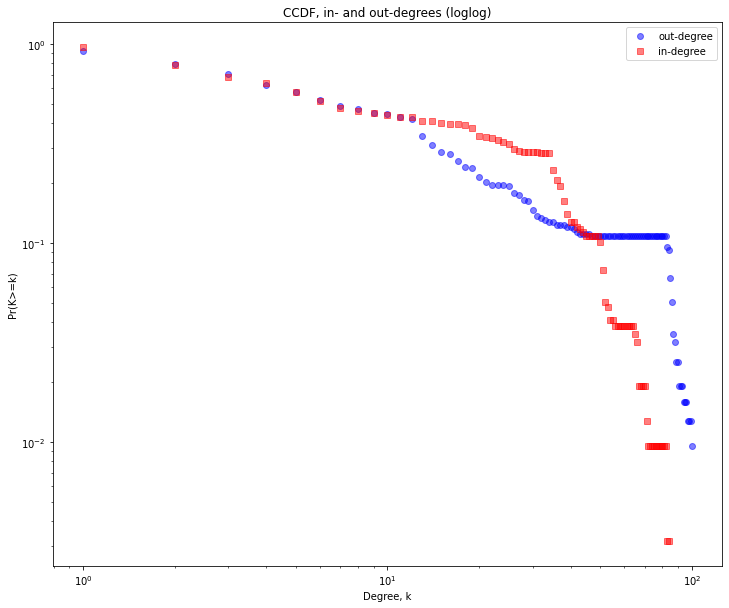

In [94]:
# this data set is from Gorochowski et al., Science Advances 4(3), eaap9751 (2018) 
# https://advances.sciencemag.org/content/4/3/eaap9751
fname = 'metabolism_afulgidus.gml'
print(f'reading the network file : {fname}\n')
##### do not modify above here #####

metabolism_graph = nx.read_gml(fname, label='id')

n = metabolism_graph.number_of_nodes()
m = metabolism_graph.number_of_edges()

kins = [metabolism_graph.in_degree(node) for node in metabolism_graph.nodes]
kouts = [metabolism_graph.out_degree(node) for node in metabolism_graph.nodes]

kin_mean = sum(kins) / n
kout_mean = sum(kouts) / n

half_kout = sum(kouts)/2

ind = 0
tot_count = 0
for kout in sorted(kouts)[::-1]:
    if tot_count < half_kout:
        tot_count += kout
        ind += 1


#nx.draw_spring(metabolism_graph)

# Your code here


##### do not modify below here #####
print(f'number of nodes, n  = {n}')
print(f'number of edges, m  = {m}')
print(f'\nmean(k_in)  = %5.2f' % kin_mean)
print(f'mean(k_out) = %5.2f' % kout_mean)
print(f'\nsmallest num for 50%  = {ind} of {n} nodes')
plot_2CCDF(kins,kouts)

In [40]:
2*m / n

34.5015873015873

Metabolism network discussion:
* The formula $\langle k \rangle = 2m /n$... gives the average total degree of nodes in the network. It is not very useful in this situation because we are dealing with a directed network, so the total degree of each node is not a very useful piece of information. Therefore, in the directed network case, this formula is not very useful. 
* The values of $\langle k_{in} \rangle$ and $\langle k_{out} \rangle$ indicate that the average in and out degrees of the nodes are identical. This means, on average, a node has the same number of edges going out of it as coming into it. The relationship of these values to $2m/n$ is that their sum gives this value. This makes sense because the average in-degree + average out-degree would give the average total degree of nodes, which as I explained, is given by this formula. 
* The CCDF plots for the in and out degrees are interesting to compare because we know that their average values are the same, so the fact that they don't line up indicates some other patterns that emerge and still produce the same mean value. Around $k=10$ we see a more stark drop-off in out-degree than in-degree, indicating that in this region, the proportion of nodes with a given in-degree is higher than the proportion of nodes with that same out-degree. Interestingly, we see a plateau in the out-degree CCDF, however, indicating that there are a number of out-degree values that are not representative of any of the nodes in this graph, while the in-degree graph continues to decline. This implies that metabolism, like other biological networks we've seen, has a lot of parts (nodes), most of which are peripheral to the overall function of the network and just a few that are very central to the operations (large in and out degrees).

**EXTRA CREDIT:** Plot a ridiculogram visualization of the network.

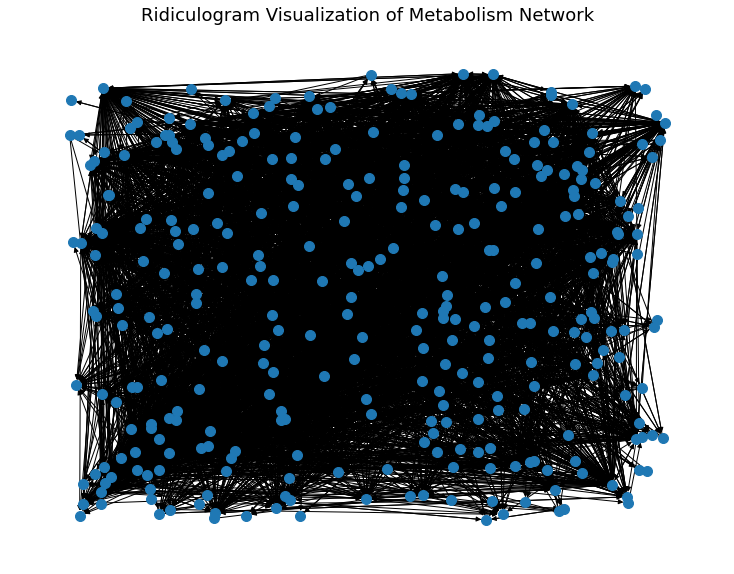

In [41]:
plt.figure(figsize=(10, 7.5))
nx.draw_random(metabolism_graph, node_size = 100)
plt.title("Ridiculogram Visualization of Metabolism Network", fontsize = 18)
plt.show()

### Problem 1-C (10 pts)
* Apply your motif counting function `count_FFBL_motifs()` from `Problem 1-A` to the `metabolism_afulgidus` directed network, with `flag=0`, to count its FFL and FBL motifs.
* Report the number of each that you find, and comment briefly on (1) their relative abundance, and (2) what you think this might mean for how 'information' might flow across this network.

In [11]:
counts = count_FFBL_motifs(metabolism_graph,0)

##### do not modify below here #####
print(f'FFL count = {counts[0]}')
print(f'FBL count = {counts[1]}')

FFL count = 47399
FBL count = 34151


There are more feed forward loops than feedback loops, but compared to the number of total nodes in this network, both of these numbers are huge. This indicates a few things:
* we can see that information does tend to travel in loops in this network. Because it is a metabolism network, it makes sense that signals are cyclic: one node may pass a signal to another telling it to do something else, and then eventually that signal will make its way back to the original node because the task is completed. 
* because of the large number of feed-forward loops, information likely travels quickly through the network (there are lots of opportunities for information to bypass waystation nodes and move more directly to the intended recipient).

***
***
## Problem 2 : Graph representations (12 pts total)

Consider the following networks.

Network 1:
![alt text](https://aaronclauset.github.io/courses/3352/network_represent_1.png "Network 1")

Network 2:
![alt text](https://aaronclauset.github.io/courses/3352/network_represent_2.png "Network 2")

***
### Problem 2-A (3 pts)

For Network 1, give the adjacency matrix representation. Let $(i\to j) \implies A_{ij}=1$.

$A = 
\begin{pmatrix}
0 & 1 & 0 & 0 & 1\\
0 & 0 & 1 & 0 & 0\\
1 & 0 & 0 & 0 & 0\\
1 & 0 & 0 & 0 & 1\\
0 & 0 & 1 & 1 & 0
\end{pmatrix}$

Ones indicate when a directed edge points from the node represented by the row to the node represented by the column. This information was gleaned through observation of the graph.

***
### Problem 2-B (3 pts)

For Network 1, give the adjacency list representation.

$[1] \rightarrow (2, 5)\\
[2] \rightarrow (3)\\
[3] \rightarrow (1)\\
[4] \rightarrow (1, 5)\\
[5] \rightarrow (3, 4)\\
$

Similarly, each list indicates to which nodes the specified node points. If you compare this to the adjacency matrix you will notice that the placement of ones in each row corresponds to the nodes listed in each adjacency list. 

***
### Problem 2-C (6 pts)

For Network 2, give the adjacency matrix representation of both one-mode projections.

Let $A_1$ represent the 5-node one-mode projection (formed by the top line of nodes), and let $A_2$ represent the 6-node one-mode projection (formed by the bottom row of nodes) in the bipartite graph of network two. Then:

$A_1 = 
\begin{pmatrix}
0 & 1 & 1 & 1 & 1\\
1 & 0 & 0 & 1 & 1\\
1 & 0 & 0 & 0 & 0\\
1 & 1 & 0 & 0 & 0\\
1 & 1 & 0 & 0 & 0
\end{pmatrix}$

$A_2 = 
\begin{pmatrix}
0 & 1 & 1 & 0 & 1 & 0\\
1 & 0 & 1 & 0 & 0 & 1\\
1 & 1 & 0 & 1 & 1 & 0\\
0 & 0 & 1 & 0 & 0 & 0\\
1 & 0 & 1 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0
\end{pmatrix}$

My work to derive the two projections is included below:

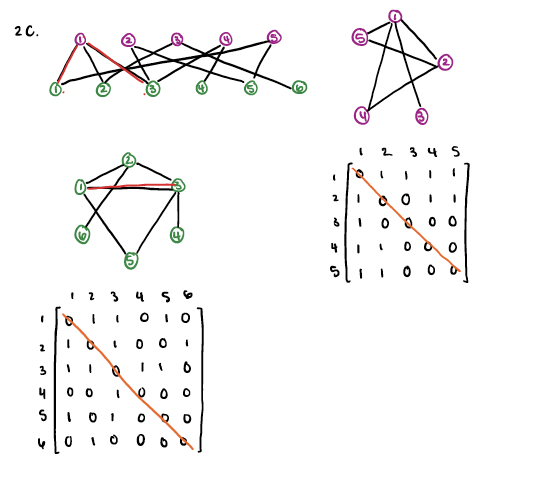

***
***

## Problem 3 : Calculations by hand (13 pts total)

For each of the following networks, calculate the requested information by hand.

Do not use software to do these calculations. Write up your answer in Markdown in the corresponding box below.

***
### Problem 3-A (6 pts)

* Enumerate and count the number of 2-cycle motifs <br/> write each in the form $(a\to b\to a)$
* Enumerate and count the number of FFL and unique FBL motifs <br/> for each FFL, note which node is "feeding forward" a signal
* Enumerate and count the number of _walks_ of length 3 <br/> write each in the form $(a\to b\to c \to d)$

Hint: A _walk_ and a _path_ are slightly different. In the former, nodes can be repeated, while in the latter, they cannot.

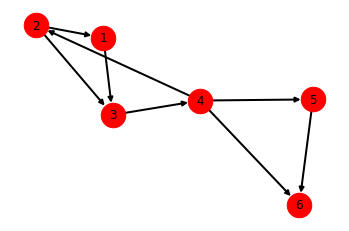

In [48]:
G = nx.DiGraph([(1,3),(2,1),(2,3),(3,4),(4,2),(4,5),(4,6),(5,6)])                     # make a directed network
nx.draw_networkx(G,arrows=True,with_labels=True,node_size=600,node_color='r',width=2) # draw it pretty
limits=plt.axis('off')                                                                # turn off axes
plt.show()                                                                            # show me the network!

In this graph there are...
* **0** 2-cycle motifs (reciprocated nodes).
* **2** FFLs (the italicized node is the one that is "feeding-forward" a signal): {(1, *2*, 3), (*4*, 5, 6)}
* **1** FBL: {(2, 3, 4)}

To count walks of length three, I will start at each node in ascending order and count all walks originating at that node:
* Starting at 1: $1 \rightarrow 3 \rightarrow 4 \rightarrow 2$,  $1 \rightarrow 3 \rightarrow 4 \rightarrow 5$, and $1 \rightarrow 3 \rightarrow 4 \rightarrow 6$
* Starting at 2: $2 \rightarrow 1 \rightarrow 3 \rightarrow 4$, $2 \rightarrow 3 \rightarrow 4 \rightarrow 2$, $2 \rightarrow 3 \rightarrow 4 \rightarrow 5$, and $2 \rightarrow 3 \rightarrow 4 \rightarrow 6$
* Starting at 3: $3 \rightarrow 4 \rightarrow 2 \rightarrow 1$, $3  \rightarrow 4 \rightarrow 2 \rightarrow 3$, and $3 \rightarrow 4 \rightarrow 5 \rightarrow 6$
* Starting at 4: $4 \rightarrow 2 \rightarrow 1 \rightarrow 3$, $4 \rightarrow 2 \rightarrow 3 \rightarrow 4$
* Starting at 5: There are none, because you can only go to 6 from 5 and from 6 you can't go anywhere.
* Starting at 6: There are none because you cannot leave node 6. 

Thus, there are **12** total walks of length 3.

***
### Problem 3-B (7 pts)

Let $G$ be the [Petersen Graph](https://en.wikipedia.org/wiki/Petersen_graph), with $n=10$ nodes and $m=15$ edges. For $\ell\in\{2,3,4,5\}$, count the number of $\ell$-cycles in $G$. For convenience, label the outer nodes $(1,2,3,4,5)$ starting at 12 o'clock and running clockwise, and label the inner nodes $(6,7,8,9,10)$ in the same fashion.

Hint: a *cycle* is a path (no edges repeated) that begins and ends at the same node.

In the 10-node Petersen graph, there are:
* **0** 2-cycles. There are no multiple edges in this graph, so there is no way to get from one node back to the same starting node by traversing two unique edges.
* **0** 3-cycles. There are also no 3-cycles in this graph. There are no "triangle" structures. 
* **0** 4-cycles. There are also no 4-cycles in this graph.
* **12** 5-cycles. To figure this out, I considered the inner 5 nodes separately from the outer 5 nodes. 
    * First, I determined there is one unique cycle among just the outer nodes $1 \rightarrow 2 \rightarrow 3 \rightarrow 4 \rightarrow 5 \rightarrow 1$. Note that one can start at any of the 5 nodes and go either clockwise or counterclockwise around the outside, but all of these iterations are just versions of the same cycle. 
    * Similarly, there is one unique cycle among the inner 5 nodes, namely $6 \rightarrow 9 \rightarrow 7 \rightarrow 10 \rightarrow 8 \rightarrow 6$. 
    * Now, I considered the edges that bridge between the outer nodes and the inner nodes. Without loss of generality, we will consider starting at any of the $5$ nodes on the outer ring, let's start at node $1$, for example. From node 1 to get to the inner ring you must go to node $6$. At node $6$ you can make one of two unique choices, either to go to node $8$ or node $9$. If you go to $8$, you can go to either node $10$ or node $3$ next and after that choice is made the remainder of the 5-cycle is fully defined. Essentially, there are $4$ 5-cycle paths that originate at each of the 5 outer nodes and go through the center, giving $20$. This, however, is double-counting these paths because they need to cross **two** of the bridge edges to get back to the original node (and thus could be written as originating from one of two outer nodes). Therefore, there are $20/2 = 10$ unique 5-cycles that start at an outer node and go through the inside group of nodes. 
    
This gives a total of $10 + 2$ = **12** 5-cycles. I have also included an image below where I illustrated some of this and enumerated the paths. 

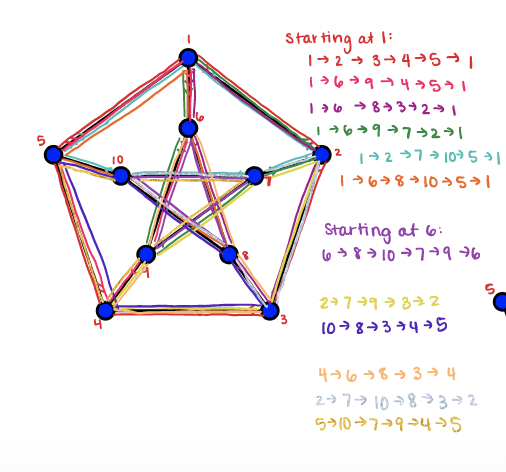

***
### Problem 3-C (*5 pts extra credit*)

Let $G$ be a network with $n$ nodes and $m=3n$ directed edges. For each of the following representations, first derive as a function of $n$ the number of *bits* required to store $G$; then, let $n=100,000$ and give the number of gigabytes necessary to store $G$. Comment on whether this is feasible. You may ignore the cost of storing any pointers.
* an adjacency matrix
* an adjacency list

Hint: It takes $\log_2 k$ bits to uniquely represent an integer of value $k$.

Your answer here

***
***

## Problem 4 : Node degree and local structure (20 pts)

The degree structure of a network is the "first-order" description of its organization, and is usually the first thing we analyze when examining any real-world network. That is, we ask the question: *how much of a network's structure is potentially driven by variation in node degrees?*

Typically, node degree correlates with many other node-level statistics, in part because higher degree nodes just have more edges attached to them, which allows them to attached to a wider variety of other nodes and structures.

In this question, you will investigate this correlation between node-level summary statistics in an open-ended fashion, focusing on how the in- and out-degrees correlate with each other and with other node-level measures. Remember that in a directed network, there are two kinds of degrees: the in-degree $k_{\rm in}$ and the out-degree $k_{\rm out}$.

* Using `networkx` functions as needed, compute the following node-level summary statistics for each node $v$ on the network from `Problem 1-B`:
  * the number of other nodes *reachable* from a node $v$ (e.g., using `single_source_shortest_path_length()`)
  * the *eccentricity* of a node $v$, defined as the maximum length geodesic from $v$
  * the *reciprocity* of a node $v$, defined as the fraction of out-edges $(v,u)$ that are reciprocated $(u,v)$
* Begin by making a scatter plot showing how in-degree $k_{i}^{\rm in}$ varies as a function of out-degree $k_{i}^{\rm out}$.
* Then make a series of additional scatter plots showing each of the three other node-level statistics covaries with in-degree and out-degree. Don't forget to label your axes (see syllabus...).
* Conclude with a brief discussion of what correlations you do and don't see, what patterns you see and what qualitative structures would give rise to them, and offer a brief explanation of your findings.

Hint 1: To explain why you think it appears, think carefully about the role that having more or fewer edges attached to some node $v$ has on the number and length of geodesic paths that originate at it.

Hint 2: For ease of comparison, plot both the in-degree and out-degree scatter on the same axes (but use different colors so you can tell them apart).

reading the network file : metabolism_afulgidus.gml



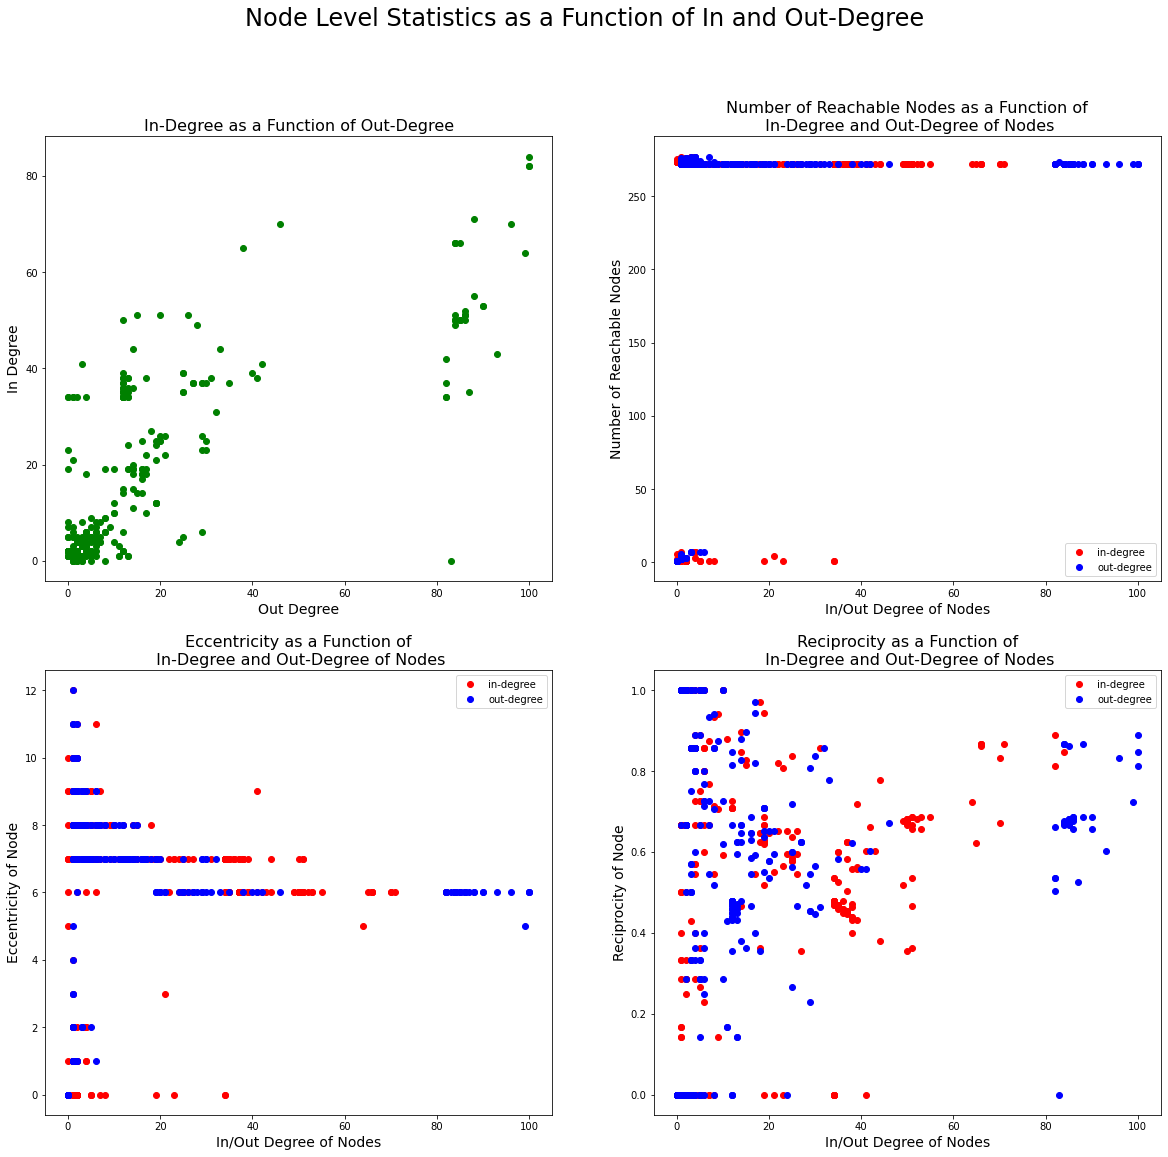

In [98]:
# this data set is from Gorochowski et al., Science Advances 4(3), eaap9751 (2018) 
# https://advances.sciencemag.org/content/4/3/eaap9751
fname = 'metabolism_afulgidus.gml'
print(f'reading the network file : {fname}\n')
##### do not modify above here #####

sssps = [nx.single_source_shortest_path_length(metabolism_graph, n) for n in metabolism_graph]

reachable_nodes = [len(sssps[i]) for i in range(len(sssps))]
eccentricity = [max(sssps[i].values()) for i in range(len(sssps))]
reciprocity = [nx.reciprocity(metabolism_graph, node) for node in metabolism_graph]

kins = [metabolism_graph.in_degree(node) for node in metabolism_graph.nodes]
kouts = [metabolism_graph.out_degree(node) for node in metabolism_graph.nodes]


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (20, 18))
fig.suptitle('Node Level Statistics as a Function of In and Out-Degree', fontsize = 24)

ax1.scatter(kouts, kins, color = 'green')
ax1.set_title('In-Degree as a Function of Out-Degree', fontsize = 16)
ax1.set_xlabel('Out Degree', fontsize=14)
ax1.set_ylabel('In Degree', fontsize=14)

ax2.scatter(kins, reachable_nodes, color='red')
ax2.scatter(kouts, reachable_nodes, color='blue')
ax2.legend(labels=['in-degree', 'out-degree'])
ax2.set_title('Number of Reachable Nodes as a Function of\n In-Degree and Out-Degree of Nodes', fontsize = 16)
ax2.set_xlabel('In/Out Degree of Nodes', fontsize=14)
ax2.set_ylabel('Number of Reachable Nodes', fontsize=14)

ax3.scatter(kins, eccentricity, color='red')
ax3.scatter(kouts, eccentricity, color='blue')
ax3.legend(labels=['in-degree', 'out-degree'])
ax3.set_title('Eccentricity as a Function of\n In-Degree and Out-Degree of Nodes', fontsize = 16)
ax3.set_xlabel('In/Out Degree of Nodes', fontsize=14)
ax3.set_ylabel('Eccentricity of Node', fontsize=14)

ax4.scatter(kins, reciprocity, color='red')
ax4.scatter(kouts, reciprocity, color='blue')
ax4.legend(labels=['in-degree', 'out-degree'])
ax4.set_title('Reciprocity as a Function of\n In-Degree and Out-Degree of Nodes', fontsize = 16)
ax4.set_xlabel('In/Out Degree of Nodes', fontsize=14)
ax4.set_ylabel('Reciprocity of Node', fontsize=14)

plt.show()

In each of these graphs there are some interesting visual features. 
* **Graph 1 (In-Degree as a function of Out-Degree)**: There is a positive correlation evident between the in and out degree nodes indicating that, in general, nodes with a higher out-degree tend to have higher in-degree as well. This makes sense in a metabolic network because there are certain nodes that would be more central to metabolic operations than others and thus both send and receive more signals. 
* **Graph 2 (Number of Reachable Nodes as a function of In and Out Degree)**: There really does not seem to be a correlation between in/out degree and the number of reachable nodes in this network. This makes sense because even if a node has a very small degree value, if a node with a large degree value is reachable, then a huge amount of other nodes will be reachable as well. We note that in a metabolic network it is really important for the network elements to be connected via edges, so it is not surprising that from the vast majority of nodes a huge proportion of the remaining nodes are reachable.  
* **Graph 3 (Eccentricity as a function of In and Out Degree)**: Eccentricity is a measure of the longest path originating at a given node. It seems, based on this graph, that large in and out degrees (but particularly out-degrees) correspond to average eccentricity values, which also makes sense. We can reason that if a node has a large out-degree:
    * A large proportion of other nodes are reachable from that node, and 
    * A large number of shortest paths originate at that node.
    
    So, we conclude that these graphs would have "ideal" eccentricity. We note that in the case of lower eccentricities, this is likely due to the fact that the node in question simply is not connected to that many other nodes and thus there is no opportunity for it to travel further, and in the case of higher eccentricities we are dealing with peripheral nodes that are members of the connected component and thus have to traverse more edges to get to other nodes in the larger network. 
* **Graph 4 (Reciprocity as a function of In and Out Degree)**: In general, there is a (weak, but present) positive correlation between in/out degree and reciprocity. This makese sense because the higher your in/out degree (as a node) the more "opportunities" you have for that edge to be reciprocated. 

***
***

## Problem 5 : Reading the literature (*10 pts extra credit*)

*This extra credit problem is meant to help you look for a project topic*

Choose a paper from the [Supplemental Reading list on the external course webpage](https://aaronclauset.github.io/courses/3352/). Read the paper (the whole paper, not just the abstract). Think about what it says. Then, write 1-3 sentences for each of the following questions in a way that clearly summarizes the work, and its context.
* What was the research question?
* What was the approach the authors took to answer that question?
* What did they do well?
* What could they have done better?
* What extensions can you envision?


Do not copy any text from the paper itself; write your own summary, in your own words in Markdown in the corresponding box below. Be sure to answer each of the five questions. The amount of extra credit will depend on the accuracy and thoughtfulness of your answers.

* *What paper did you choose?*<br/>
Give the Authors, Title, Publication Venue, Year
<br/>


* *What was the research question?*<br/>
Your answer here
<br/>

* *What was the approach the authors took to answer that question?*<br/>
Your answer here
<br/>

* *What did they do well?*<br/>
Your answer here
<br/>

* *What could they have done better?*<br/>
Your answer here
<br/>

* *What extensions can you envision?*<br/>
Your answer here